<a href="https://colab.research.google.com/github/pedroeli07/temperatura_media_insights/blob/main/temperatura_media_insights(grupos_de_latitude).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
# Importe a biblioteca google.colab.drive
import google.colab.drive

# Monte o Google Drive
google.colab.drive.mount('/content/drive')

path = '/content/drive/My Drive/df_FILTRADO.csv'
df_copy = pd.read_csv(path)
display(df_copy)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Cidade,País,Latitude,Longitude,Média Incerteza Média,Variação de Temperatura Média
0,Norilsk,Russia,69.92,88.83,1.110143,2.674072
1,Quebec,Canada,47.42,72.24,0.371247,2.618036
2,Ottawa,Canada,45.81,75.00,0.321270,2.605047
3,Montreal,Canada,45.81,72.69,0.308446,2.561578
4,Sherbrooke,Canada,45.81,72.69,0.308446,2.561578
...,...,...,...,...,...,...
3443,Sucre,Bolivia,18.48,65.92,0.701475,0.434228
3444,Oruro,Bolivia,18.48,67.61,0.678083,0.425764
3445,Potosí,Bolivia,20.09,66.54,0.737829,0.416425
3446,Salta,Argentina,24.92,65.62,0.539450,0.384742


Não há cidades duplicadas na saída.
       Média Incerteza Média  Variação de Temperatura Média
count            3448.000000                    3448.000000
mean                0.444294                       1.228171
std                 0.112340                       0.374972
min                 0.235643                       0.384742
25%                 0.368679                       0.962575
50%                 0.434190                       1.156153
75%                 0.509872                       1.418949
max                 1.110143                       2.674072


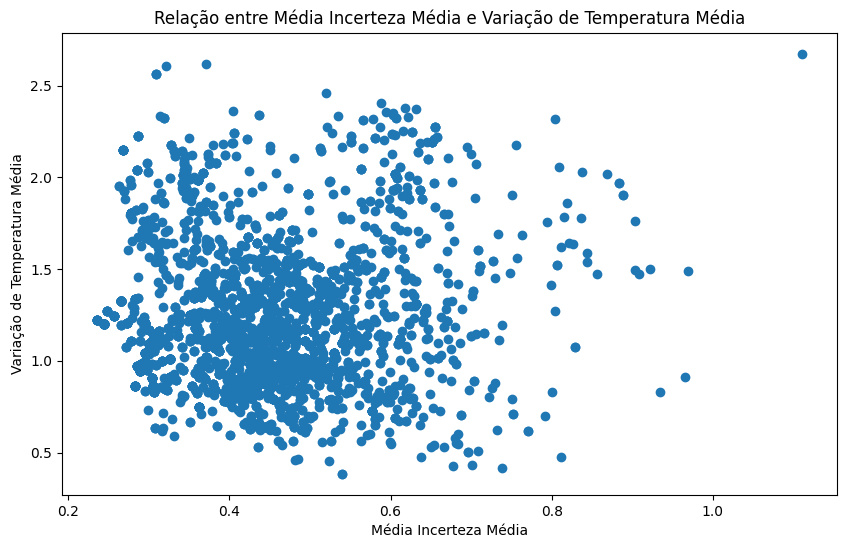

In [54]:
import matplotlib.pyplot as plt
# Verificar se há duplicatas na coluna 'Cidade'
if df_copy['Cidade'].duplicated().any():
    print("Há cidades duplicadas na saída.")
else:
    print("Não há cidades duplicadas na saída.")

# Estatísticas descritivas
print(df_copy[['Média Incerteza Média', 'Variação de Temperatura Média']].describe())

# Gráfico de dispersão para Média Incerteza Média versus Variação de Temperatura Média
plt.figure(figsize=(10, 6))
plt.scatter(df_copy['Média Incerteza Média'], df_copy['Variação de Temperatura Média'])
plt.xlabel('Média Incerteza Média')
plt.ylabel('Variação de Temperatura Média')
plt.title('Relação entre Média Incerteza Média e Variação de Temperatura Média')
plt.show()

In [55]:
import numpy as np

# Defina a largura do intervalo de latitude (ajuste conforme necessário)
intervalo_latitude = 1.0
# Crie uma nova coluna 'Grupo de Latitude' com base nos intervalos
df_copy['Grupo de Latitude'] = np.floor(df_copy['Latitude'] / intervalo_latitude) * intervalo_latitude
# Agrupe pelo 'Grupo de Latitude' e exiba as cidades dentro de cada grupo
grupos_latitude = df_copy.groupby('Grupo de Latitude')
# Inicialize uma lista para armazenar os DataFrames de cada grupo
dataframes_grupos = []
# Iterar sobre os grupos e criar DataFrames para cada grupo
for grupo, grupo_df in grupos_latitude:
    # Crie uma cópia explícita do DataFrame para evitar o SettingWithCopyWarning
    grupo_info = grupo_df[['Cidade', 'País', 'Média Incerteza Média', 'Variação de Temperatura Média']].copy()

    # Adicione as informações relevantes ao DataFrame do grupo
    grupo_info['Grupo de Latitude'] = grupo

    # Adicione o DataFrame do grupo à lista
    dataframes_grupos.append(grupo_info)

# Concatene todos os DataFrames de grupos em um único DataFrame
df_grupos = pd.concat(dataframes_grupos, ignore_index=True)
# Exiba o DataFrame resultante
display(df_grupos)

,Cidade,País,Média Incerteza Média,Variação de Temperatura Média,Grupo de Latitude
0,Libreville,Gabon,0.522388,1.275892,0.0
1,Padang,Indonesia,0.461155,1.264714,0.0
2,Payakumbuh,Indonesia,0.461155,1.264714,0.0
3,Pasir Gudang,Malaysia,0.373256,1.256411,0.0
4,Singapore,Singapore,0.373256,1.256411,0.0
...,...,...,...,...,...
3443,Arkhangelsk,Russia,0.472447,1.940639,65.0
3444,Oulu,Finland,0.398309,1.813606,65.0
3445,Reykjavík,Iceland,0.526197,1.492053,65.0
3446,Murmansk,Russia,0.450505,2.171350,68.0


In [56]:
# Contar o número de cidades em cada grupo de latitude
contagem_cidades_por_grupo = df_grupos.groupby('Grupo de Latitude')['Cidade'].count().reset_index()

# Renomear a coluna para refletir a contagem
contagem_cidades_por_grupo = contagem_cidades_por_grupo.rename(columns={'Cidade': 'Número de Cidades'})

display(contagem_cidades_por_grupo)

,Grupo de Latitude,Número de Cidades
0,0.0,45
1,2.0,36
2,4.0,65
3,5.0,115
4,7.0,152
5,8.0,84
6,10.0,92
7,12.0,59
8,13.0,84
9,15.0,78


In [57]:
# Função para encontrar as duas cidades com maior e duas com menor variação de temperatura em um grupo
def extremos_variacao_grupo(grupo_df):
    # Ordenar o grupo pela variação de temperatura média
    grupo_df = grupo_df.sort_values(by='Variação de Temperatura Média', ascending=False)

    # Pegar as duas cidades com maior e duas com menor variação
    maiores_variacoes = grupo_df.head(2)
    menores_variacoes = grupo_df.tail(2)

    # Concatenar e retornar os resultados
    return pd.concat([maiores_variacoes, menores_variacoes])

# Aplicar a função a cada grupo de latitude
resultados_por_grupo = df_copy.groupby('Grupo de Latitude').apply(extremos_variacao_grupo)
pd.set_option('display.max_rows', None)
# Exibir os resultados
display(resultados_por_grupo[['Cidade', 'País', 'Média Incerteza Média', 'Variação de Temperatura Média']])

Cidade  \
Grupo de Latitude                             
0.0               1276           Libreville   
                  1309           Payakumbuh   
                  3138            Kisangani   
                  3190               Sorong   
2.0               1281            Mogadishu   
                  1314               Kluang   
                  3191               Bukavu   
                  3224                Kindu   
4.0               930                Okrika   
                  931         Port Harcourt   
                  3283              Iquitos   
                  3302                Ambon   
5.0               815                  Ugep   
                  820               Calabar   
                  3251               Tabora   
                  3275              Kalemie   
7.0               609                Nsukka   
                  610                 Enugu   
                  3213             Chiclayo   
                  3435            Cajamarca   
8.0               499                 Abuja   
                  501                 Minna   
                  3405             Trujillo   
                  3409             Pucallpa   
10.0              384                Kaduna   
                  385                 Zaria   
                  3372           Rio Branco   
                  3426              Huánuco   
12.0              275                  Kano   
                  292                Funtua   
                  3342                Kitwe   
                  3427             Huancayo   
13.0              183                Maradi   
                  184               Katsina   
                  3430                Cusco   
                  3431             Ayacucho   
15.0              498                Asmara   
                  699               Kassala   
                  3436              Juliaca   
                  3437                 Puno   
16.0              479                Najran   
                  682               Salalah   
                  3415               Cairns   
                  3438           Cochabamba   
18.0              416                  Abha   
                  919               Córdoba   
                  3443                Sucre   
                  3444                Oruro   
20.0              1156             Linhares   
                  1210            Salamanca   
                  3410              Iquique   
                  3445               Potosí   
21.0              414                 Mecca   
                  679                Jiddah   
                  3223             Dourados   
                  3439               Tarija   
23.0              409                 Aswan   
                  948             Zacatecas   
                  3320           Phalaborwa   
                  3428               Calama   
24.0              269                Riyadh   
                  282                 Dubai   
                  3446                Salta   
                  3447                Jujuy   
26.0              277              Buraydah   
                  300                 Sabha   
                  3429              Formosa   
                  3441              Tucuman   
28.0              129                Jahrom   
                  206                Jiroft   
                  3440  Santiago Del Estero   
                  3442            Catamarca   
29.0              42                 Sirjan   
                  43              Rafsanjan   
                  3417           Uruguaiana   
                  3424             La Rioja   
31.0              12                   Yazd   
                  44               Shahreza   
                  3413            Concordia   
                  3414                Salto   
32.0              8                 Birjand   
                  125               Esfahan   
                  3367           San Martin   
                  3371         San Bernard

In [58]:
# Função para encontrar as duas cidades com maior e duas com menor variação de temperatura em um grupo
def extremos_variacao_grupo(grupo_df):
    # Ordenar o grupo pela variação de temperatura média
    grupo_df = grupo_df.sort_values(by='Variação de Temperatura Média', ascending=False)

    # Pegar as duas cidades com maior e duas com menor variação
    maiores_variacoes2 = grupo_df.head(1)
    menores_variacoes2 = grupo_df.tail(1)

    # Concatenar e retornar os resultados
    return pd.concat([maiores_variacoes2, menores_variacoes2])

# Aplicar a função a cada grupo de latitude
resultados_por_grupo2 = df_copy.groupby('Grupo de Latitude').apply(extremos_variacao_grupo)

# Exibir os resultados
display(resultados_por_grupo2[['Cidade', 'País', 'Média Incerteza Média', 'Variação de Temperatura Média']])

Cidade                                País  \
Grupo de Latitude                                                          
0.0               1276    Libreville                               Gabon   
                  3190        Sorong                           Indonesia   
2.0               1281     Mogadishu                             Somalia   
                  3224         Kindu  Congo (Democratic Republic Of The)   
4.0               930         Okrika                             Nigeria   
                  3302         Ambon                           Indonesia   
5.0               815           Ugep                             Nigeria   
                  3275       Kalemie  Congo (Democratic Republic Of The)   
7.0               609         Nsukka                             Nigeria   
                  3435     Cajamarca                                Peru   
8.0               499          Abuja                             Nigeria   
                  3409      Pucallpa                                Peru   
10.0              384         Kaduna                             Nigeria   
                  3426       Huánuco                                Peru   
12.0              275           Kano                             Nigeria   
                  3427      Huancayo                                Peru   
13.0              183         Maradi                               Niger   
                  3431      Ayacucho                                Peru   
15.0              498         Asmara                             Eritrea   
                  3437          Puno                                Peru   
16.0              479         Najran                        Saudi Arabia   
                  3438    Cochabamba                             Bolivia   
18.0              416           Abha                        Saudi Arabia   
                  3444         Oruro                             Bolivia   
20.0              1156      Linhares                              Brazil   
                  3445        Potosí                             Bolivia   
21.0              414          Mecca                        Saudi Arabia   
                  3439        Tarija                             Bolivia   
23.0              409          Aswan                               Egypt   
                  3428        Calama                               Chile   
24.0              269         Riyadh                        Saudi Arabia   
                  3447         Jujuy                           Argentina   
26.0              277       Buraydah                        Saudi Arabia   
                  3441       Tucuman                           Argentina   
28.0              129         Jahrom                                Iran   
                  3442     Catamarca                           Argentina   
29.0              42          Sirjan                                Iran   
                  3424      La Rioja                           Argentina   
31.0              12            Yazd                                Iran   
                  3414         Salto                             Uruguay   
32.0              8          Birjand                                Iran   
                  3371  San Bernardo                               Chile   
34.0              30             Qom                                Iran   
                  3403        Curico                               Chile   
36.0              7         Sabzevar                                Iran   
                  3423         Talca                               Chile   
37.0              26         Asgabat                        Turkmenistan   
                  3387        Weihai                               China   
39.0              29        Parsabad                                Iran   
                  3420      Valdivia                               Chile   
40.0              25         Dasoguz                        Turkmenistan   
  

In [59]:
# Resetar o índice do DataFrame original
resultados_por_grupo2.reset_index(drop=True, inplace=True)

# Calcular a diferença entre a maior e a menor variação em cada grupo
resultados_por_grupo3 = resultados_por_grupo2.groupby('Grupo de Latitude').apply(lambda grupo: grupo.loc[grupo['Variação de Temperatura Média'].idxmax()]['Variação de Temperatura Média'] - grupo.loc[grupo['Variação de Temperatura Média'].idxmin()]['Variação de Temperatura Média'])

# Supondo que resultados_por_grupo3 seja a Series que contém seus resultados
resultados_df = pd.DataFrame(resultados_por_grupo3, columns=['Diferença Var Temp Med'])

# Resetando o índice para tornar 'Grupo de Latitude' uma coluna regular
resultados_df.reset_index(inplace=True)

# Mesclar com o DataFrame original para obter as colunas adicionais
resultados_df = pd.merge(resultados_df, resultados_por_grupo2[['Cidade', 'País', 'Média Incerteza Média', 'Grupo de Latitude']], on='Grupo de Latitude')

# Ordenar o DataFrame
resultados_df = resultados_df.sort_values(by='Diferença Var Temp Med', ascending=False)

# Exibir o DataFrame completo
display(resultados_df)

,Grupo de Latitude,Diferença Var Temp Med,Cidade,País,Média Incerteza Média
57,45.0,1.889014,Honggang,China,0.475149
56,45.0,1.889014,Ottawa,Canada,0.321270
59,47.0,1.849592,Zalantun,China,0.529358
58,47.0,1.849592,Quebec,Canada,0.371247
44,36.0,1.842300,Sabzevar,Iran,0.587930
45,36.0,1.842300,Talca,Chile,0.478450
52,42.0,1.772914,Nukus,Uzbekistan,0.632033
53,42.0,1.772914,Vladivostok,Russia,0.571301
39,31.0,1.756178,Salto,Uruguay,0.400488
38,31.0,1.756178,Yazd,Iran,0.603582


In [60]:
# Filtrar o DataFrame original para excluir os grupos 57 a  e 69.0
dados_filtrados = resultados_df[~resultados_df['Grupo de Latitude'].isin([57.0, 58.0, 60.0, 61.0, 63.0, 65.0, 68.0, 69.0])]
# Exibir a contagem de cidades por grupo de latitude
display(dados_filtrados)

,Grupo de Latitude,Diferença Var Temp Med,Cidade,País,Média Incerteza Média
57,45.0,1.889014,Honggang,China,0.475149
56,45.0,1.889014,Ottawa,Canada,0.321270
59,47.0,1.849592,Zalantun,China,0.529358
58,47.0,1.849592,Quebec,Canada,0.371247
44,36.0,1.842300,Sabzevar,Iran,0.587930
45,36.0,1.842300,Talca,Chile,0.478450
52,42.0,1.772914,Nukus,Uzbekistan,0.632033
53,42.0,1.772914,Vladivostok,Russia,0.571301
39,31.0,1.756178,Salto,Uruguay,0.400488
38,31.0,1.756178,Yazd,Iran,0.603582


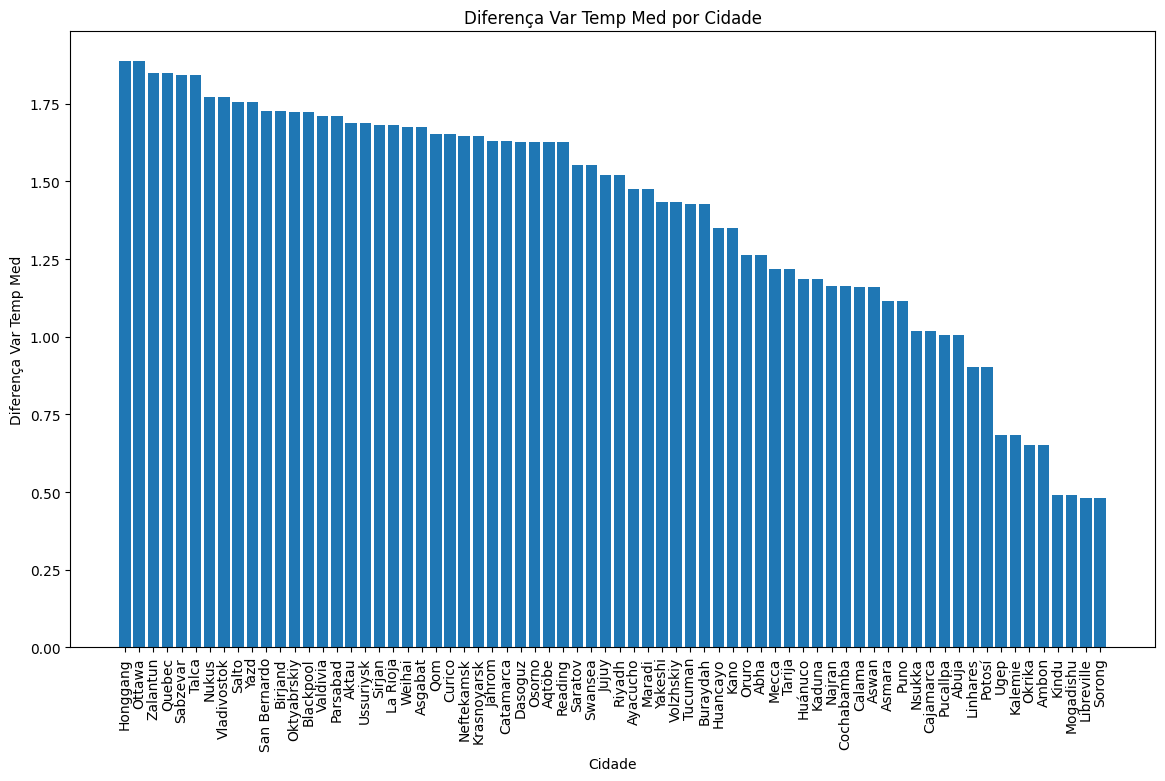

In [61]:
# Gráfico de barras para Variação de Temperatura Média
plt.figure(figsize=(14, 8))
plt.bar(dados_filtrados['Cidade'], dados_filtrados['Diferença Var Temp Med'])
plt.xticks(rotation=90)
plt.xlabel('Cidade')
plt.ylabel('Diferença Var Temp Med')
plt.title('Diferença Var Temp Med por Cidade')
plt.show()

In [62]:
# Mesclar os DataFrames usando a coluna 'Cidade'
dados_filtrados_com_variacao = pd.merge(dados_filtrados, resultados_por_grupo2[['Cidade', 'Variação de Temperatura Média']], on='Cidade', how='left')

# Exibir o DataFrame resultante
display(dados_filtrados_com_variacao)

,Grupo de Latitude,Diferença Var Temp Med,Cidade,País,Média Incerteza Média,Variação de Temperatura Média
0,45.0,1.889014,Honggang,China,0.475149,0.716033
1,45.0,1.889014,Ottawa,Canada,0.321270,2.605047
2,47.0,1.849592,Zalantun,China,0.529358,0.768444
3,47.0,1.849592,Quebec,Canada,0.371247,2.618036
4,36.0,1.842300,Sabzevar,Iran,0.587930,2.404483
5,36.0,1.842300,Talca,Chile,0.478450,0.562183
6,42.0,1.772914,Nukus,Uzbekistan,0.632033,2.371422
7,42.0,1.772914,Vladivostok,Russia,0.571301,0.598508
8,31.0,1.756178,Salto,Uruguay,0.400488,0.594172
9,31.0,1.756178,Yazd,Iran,0.603582,2.350350


In [63]:
# Selecione apenas as colunas necessárias de df_copy
df_copy_subset = df_copy[['Cidade', 'Latitude', 'Longitude']]

# Faça o merge com dados_filtrados_com_variacao usando a coluna 'Cidade' como chave
dados_filtrados_com_variacao = pd.merge(dados_filtrados_com_variacao, df_copy_subset, on='Cidade', how='left')

dados_filtrados_com_variacao['País'] = dados_filtrados_com_variacao['País'].replace({'Congo (Democratic Republic Of The)': 'Congo'})

# Exiba o DataFrame resultante
display(dados_filtrados_com_variacao)

,Grupo de Latitude,Diferença Var Temp Med,Cidade,País,Média Incerteza Média,Variação de Temperatura Média,Latitude,Longitude
0,45.0,1.889014,Honggang,China,0.475149,0.716033,45.81,125.77
1,45.0,1.889014,Ottawa,Canada,0.321270,2.605047,45.81,75.00
2,47.0,1.849592,Zalantun,China,0.529358,0.768444,47.42,121.97
3,47.0,1.849592,Quebec,Canada,0.371247,2.618036,47.42,72.24
4,36.0,1.842300,Sabzevar,Iran,0.587930,2.404483,36.17,57.68
5,36.0,1.842300,Talca,Chile,0.478450,0.562183,36.17,71.60
6,42.0,1.772914,Nukus,Uzbekistan,0.632033,2.371422,42.59,58.91
7,42.0,1.772914,Vladivostok,Russia,0.571301,0.598508,42.59,130.91
8,31.0,1.756178,Salto,Uruguay,0.400488,0.594172,31.35,58.43
9,31.0,1.756178,Yazd,Iran,0.603582,2.350350,31.35,54.66


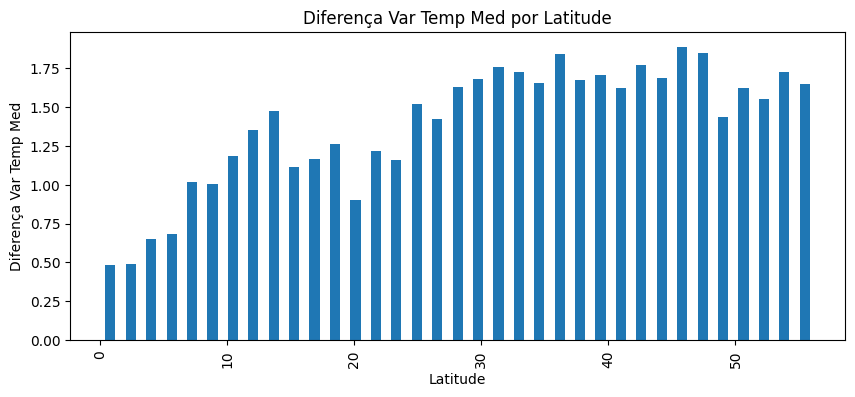

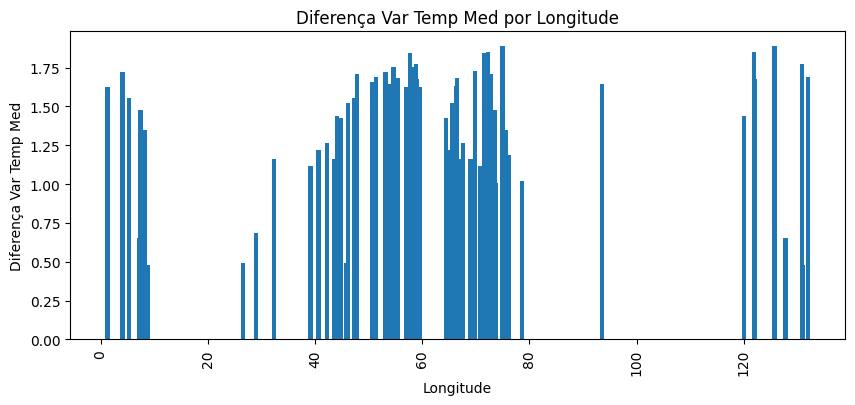

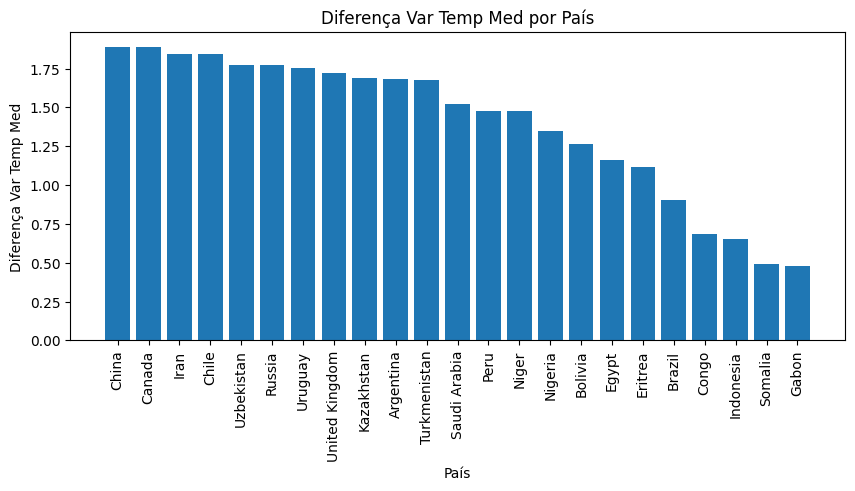

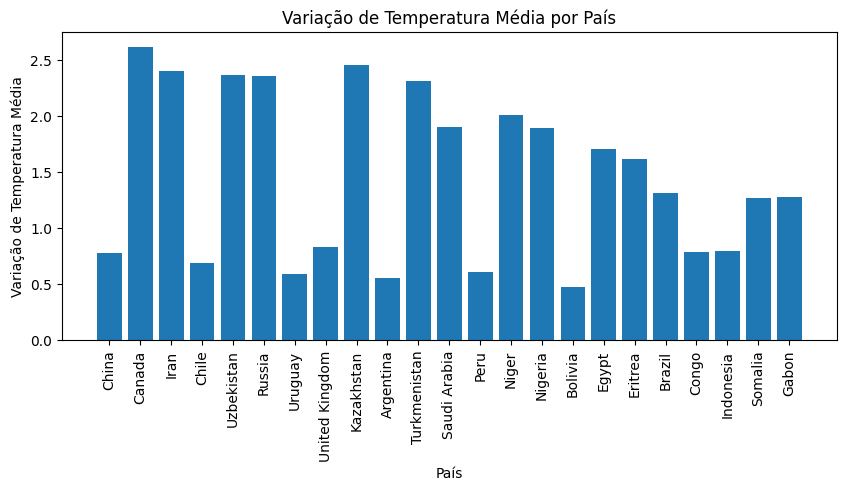

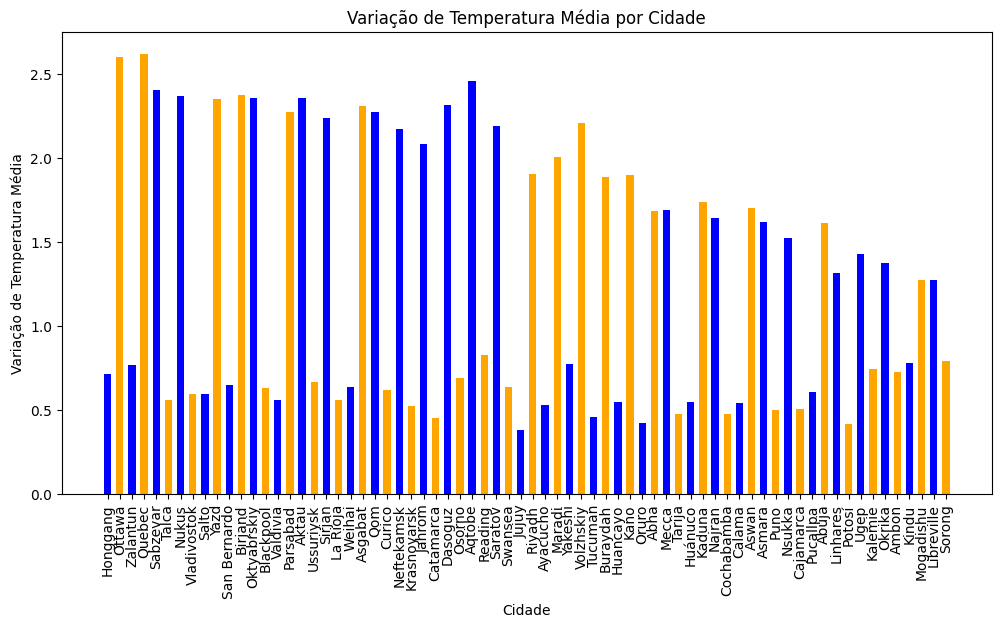

In [64]:
plt.figure(figsize=(10, 4))
plt.bar(dados_filtrados_com_variacao['Latitude'], dados_filtrados_com_variacao['Diferença Var Temp Med'])
plt.xticks(rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Diferença Var Temp Med')
plt.title('Diferença Var Temp Med por Latitude')
plt.show()

plt.figure(figsize=(10, 4))
plt.bar(dados_filtrados_com_variacao['Longitude'], dados_filtrados_com_variacao['Diferença Var Temp Med'])
plt.xticks(rotation=90)
plt.xlabel('Longitude')
plt.ylabel('Diferença Var Temp Med')
plt.title('Diferença Var Temp Med por Longitude')
plt.show()

plt.figure(figsize=(10, 4))
plt.bar(dados_filtrados_com_variacao['País'], dados_filtrados_com_variacao['Diferença Var Temp Med'])
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Diferença Var Temp Med')
plt.title('Diferença Var Temp Med por País')
plt.show()

plt.figure(figsize=(10, 4))
plt.bar(dados_filtrados_com_variacao['País'], dados_filtrados_com_variacao['Variação de Temperatura Média'])
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Variação de Temperatura Média')
plt.title('Variação de Temperatura Média por País')
plt.show()

# Cores alternadas
cores = ['blue', 'orange']
# Largura das barras
largura_barras = 0.6
# Gráfico de barras para Variação de Temperatura Média por Cidade
plt.figure(figsize=(12, 6))
# Plotar barras com cores alternadas
plt.bar(dados_filtrados_com_variacao['Cidade'], dados_filtrados_com_variacao['Variação de Temperatura Média'],
        color=cores * (len(dados_filtrados_com_variacao) // len(cores) + 1), width=largura_barras)
plt.xticks(rotation=90)
plt.xlabel('Cidade')
plt.ylabel('Variação de Temperatura Média')
plt.title('Variação de Temperatura Média por Cidade')
plt.show()

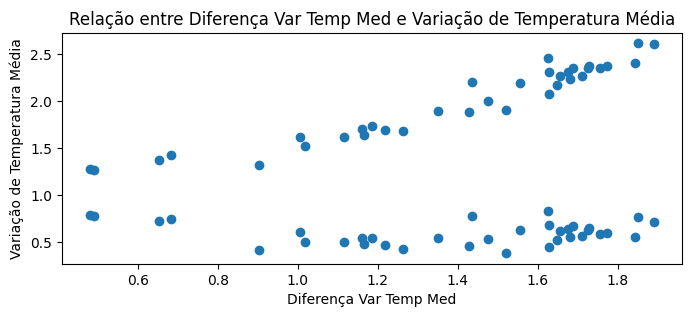

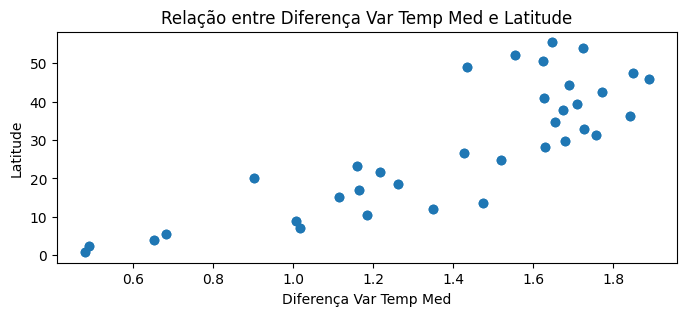

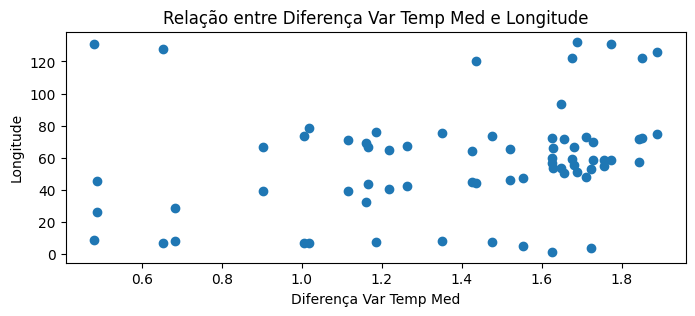

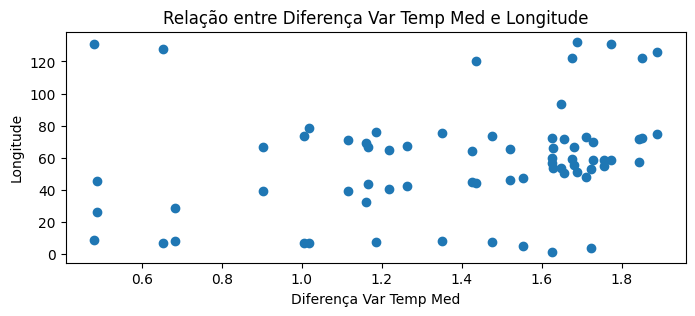

In [65]:
# Gráfico de dispersão para Diferença Var Temp Meda versus Variação de Temperatura Média
plt.figure(figsize=(8, 3))
plt.scatter(dados_filtrados_com_variacao['Diferença Var Temp Med'], dados_filtrados_com_variacao['Variação de Temperatura Média'])
plt.xlabel('Diferença Var Temp Med')
plt.ylabel('Variação de Temperatura Média')
plt.title('Relação entre Diferença Var Temp Med e Variação de Temperatura Média')
plt.show()
# Gráfico de dispersão para Diferença Var Temp Meda versus Latitude
plt.figure(figsize=(8, 3))
plt.scatter(dados_filtrados_com_variacao['Diferença Var Temp Med'], dados_filtrados_com_variacao['Latitude'])
plt.xlabel('Diferença Var Temp Med')
plt.ylabel('Latitude')
plt.title('Relação entre Diferença Var Temp Med e Latitude')
plt.show()
# Gráfico de dispersão para Diferença Var Temp Meda versus Longitude
plt.figure(figsize=(8, 3))
plt.scatter(dados_filtrados_com_variacao['Diferença Var Temp Med'], dados_filtrados_com_variacao['Longitude'])
plt.xlabel('Diferença Var Temp Med')
plt.ylabel('Longitude')
plt.title('Relação entre Diferença Var Temp Med e Longitude')
plt.show()
# Gráfico de dispersão para Diferença Var Temp Meda versus Longitude
plt.figure(figsize=(8, 3))
plt.scatter(dados_filtrados_com_variacao['Diferença Var Temp Med'], dados_filtrados_com_variacao['Longitude'])
plt.xlabel('Diferença Var Temp Med')
plt.ylabel('Longitude')
plt.title('Relação entre Diferença Var Temp Med e Longitude')
plt.show()

In [66]:
# Filtrar as colunas "Cidade" e "País"
cidades_paises = dados_filtrados_com_variacao[['Cidade', 'País']]

# Configurar a exibição máxima de linhas
pd.set_option('display.max_rows', None)
display(cidades_paises)

,Cidade,País
0,Honggang,China
1,Ottawa,Canada
2,Zalantun,China
3,Quebec,Canada
4,Sabzevar,Iran
5,Talca,Chile
6,Nukus,Uzbekistan
7,Vladivostok,Russia
8,Salto,Uruguay
9,Yazd,Iran


In [67]:
pd.reset_option('display.max_rows')